In [ ]:
from constants import *
from data_loading import *
from data_cleaning import *
from utils import *
from embeddings import *
from prediction import *
import matplotlib.pyplot as plt

#import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)


# load training set as DataFrame
train = load_df(TRAIN_NEG, TRAIN_POS, TWEET, LABEL, LABEL_NEG, LABEL_POS)

# load testing set as DataFrame
test = pd.DataFrame({TWEET: load_txt(TEST_DATA)})

# set patterns to remove, replace, and replace with
to_remove = "<user>"
to_replace = "[^a-zA-Z#]"
replace_value = " "

In [ ]:
# clean training set
train = clean(train, TWEET, CLEAN_TWEET, to_remove, to_replace, replace_value)

#clean test set
test = clean(test, TWEET, CLEAN_TWEET, to_remove, to_replace, replace_value)

In [ ]:
train.head()

### META functions

In [ ]:
def accuracies(classifier, tweet, min_df, min_features, max_features, steps, ngram_range):
    """ Iterates on the given parameters range and using the specified classifier, logs accuracies obtained into a
    Dataframe"""
    
    features = np.arange(min_features, max_features, step=steps)
    results = []
    for i in ngram_range: 
        res_i = []
        for j in features:
            accuracy = classifier(train, test, tweets_col = tweet, ngram_range=i, max_features =j, min_df=min_df)
            res_i.append(accuracy)
        results.append(res_i)
    return pd.DataFrame(results, columns=features)

In [ ]:
def plot_accuracies(accs_clean, accs_noclean, legends, colors, title, axis_labels, filename):
    nb_plots = len(accs_clean)
    plotable_df_clean = accs_clean.transpose()
    plotable_df_clean['nfeatures'] = plotable_df_clean.index

    plotable_df_noclean = accs_noclean.transpose()
    plotable_df_noclean['nfeatures'] = plotable_df_noclean.index
        
    plt.figure(figsize=(8,6))

    for i in range(0, nb_plots):
        plt.plot(plotable_df_clean[i].index, plotable_df_clean[i].values,label=legends[i] + ' (clean)',color=colors[i])
        plt.plot(plotable_df_noclean[i].index, plotable_df_noclean[i].values,label=legends[i],color=colors[i], linestyle=':')
        
    plt.title(title)
    plt.xlabel(axis_labels[0])
    plt.ylabel(axis_labels[1])
    plt.legend()
    
    if not os.path.exists(PLOTS_FOLDER):
        os.makedirs(PLOTS_FOLDER)
    plt.savefig(PLOTS_FOLDER + filename + '.pdf') #pdf is a better choice than png as it is vectorial

### Bag of Words

In [8]:
bow_accs_clean = accuracies(classify_bow,CLEAN_TWEET, min_df=1, min_features=10000, max_features=110000, 
                              steps=10000, ngram_range=[(1,1), (1,2), (1,3)])
bow_accs_clean

,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000
0,0.783717,0.785617,0.785867,0.786450,0.786417,0.786500,0.78660,0.786450,0.786450,0.786450
1,0.787800,0.791967,0.792550,0.793317,0.793600,0.794217,0.79450,0.794850,0.795350,0.795783
2,0.787917,0.791067,0.792117,0.792483,0.793483,0.794033,0.79465,0.795017,0.794833,0.795383


In [9]:
bow_accs_noclean = accuracies(classify_bow,TWEET, min_df=1, min_features=10000, max_features=110000, 
                              steps=10000, ngram_range=[(1,1), (1,2), (1,3)])
bow_accs_noclean

,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000
0,0.789383,0.791350,0.792333,0.792900,0.792833,0.793233,0.792917,0.79300,0.792867,0.792917
1,0.793933,0.798817,0.800550,0.800950,0.801383,0.801517,0.802050,0.80245,0.802717,0.802483
2,0.793583,0.797833,0.798983,0.799933,0.800883,0.801633,0.801733,0.80170,0.802517,0.802683


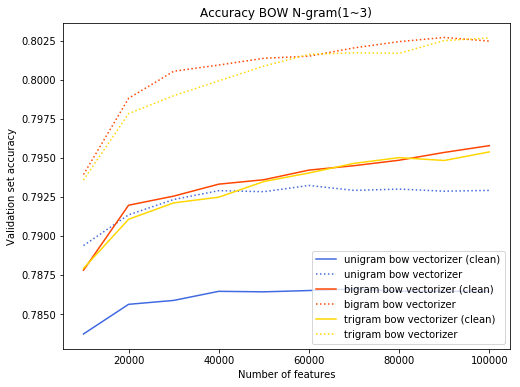

In [10]:
plot_accuracies(
    bow_accs_clean,
    bow_accs_noclean,
    legends = ['unigram bow vectorizer', 'bigram bow vectorizer', 'trigram bow vectorizer'],
    colors = ['royalblue', 'orangered', 'gold'],
    title = 'Accuracy BOW N-gram(1~3)',
    axis_labels =['Number of features','Validation set accuracy'],
    filename = "plot_bow"
)

### TF IDF

In [11]:
tfidf_accs_clean = accuracies(classify_tfidf,CLEAN_TWEET, min_df=1, min_features=10000, max_features=110000, 
                              steps=10000, ngram_range=[(1,1), (1,2), (1,3)])
tfidf_accs_clean

,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000
0,0.783067,0.78395,0.784367,0.784367,0.784717,0.784417,0.784767,0.784967,0.784967,0.784967
1,0.788267,0.79070,0.791983,0.792750,0.793017,0.793300,0.794133,0.794367,0.794650,0.794683
2,0.787950,0.79020,0.792283,0.792467,0.793167,0.793033,0.793650,0.794233,0.794233,0.794317


In [12]:
tfidf_accs_noclean = accuracies(classify_tfidf,TWEET, min_df=1, min_features=10000, max_features=110000, 
                              steps=10000, ngram_range=[(1,1), (1,2), (1,3)])
tfidf_accs_noclean

,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000
0,0.788033,0.789650,0.790483,0.790950,0.790917,0.790467,0.790500,0.790750,0.790983,0.790633
1,0.795117,0.798883,0.800083,0.800867,0.800733,0.801617,0.801967,0.802400,0.802583,0.802367
2,0.794150,0.798300,0.799633,0.800867,0.801417,0.801950,0.802250,0.802183,0.802433,0.802617


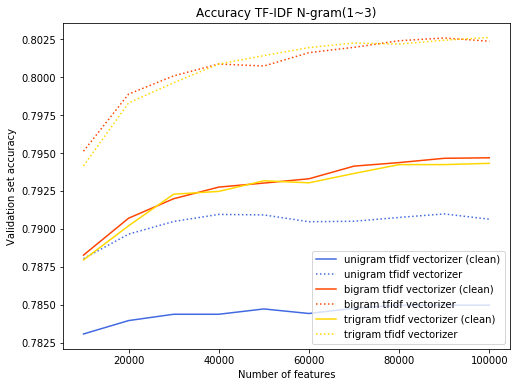

In [13]:
plot_accuracies(
    tfidf_accs_clean,
    tfidf_accs_noclean,
    legends = ['unigram tfidf vectorizer', 'bigram tfidf vectorizer', 'trigram tfidf vectorizer'],
    colors = ['royalblue', 'orangered', 'gold'],
    title = 'Accuracy TF-IDF N-gram(1~3)',
    axis_labels =['Number of features','Validation set accuracy'],
    filename = "plot_tfidf"
)

### Fasttext (prediction)

#### on "clean_tweet"

In [ ]:
classify_fasttext(train, test, tweets_col = CLEAN_TWEET, max_iter = 50)

classifying: 40.0%, best_acc=0.780933333333333409333333333334

#### on "tweet"

In [ ]:
classify_fasttext(train, test, tweets_col = TWEET, max_iter = 50)